Estos son los datos obtenidos
   t(s)   x(m)
0   0.0  0.000
1   0.1  0.010
2   0.2  0.025
3   0.3  0.055
4   0.4  0.095
5   0.5  0.145
6   0.6  0.190
θmax=0.45(Angúlo en el cual comienza a deslizar(rad))
Δθmax=0.01(Incertidumbre angúlo(rad))
Δt=0.005(Incertidumbre tiempo(s))
Δx=0.005(Incertidumbre longitud(m))
-----------------------------------
Esta es la representación gráfica con su incertidumbre de x(m) vs t(s)


Text(0.5, 0, 't(s)')

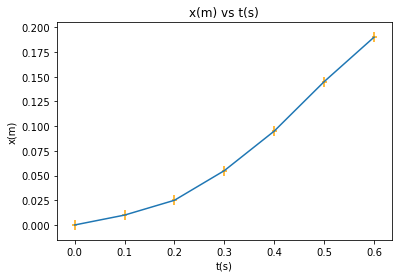

In [2]:
#PUNTO 1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
datos=pd.read_csv('datos.csv')
Δt=0.01/2#s
Δx=0.01/2#m
θmax=round(np.radians(26),2)#radianes
Δθmax=round(np.radians(1/2),2)#radianes
print('Estos son los datos obtenidos')
print(datos)
print('θmax='+str(θmax)+'(Angúlo en el cual comienza a deslizar(rad))')
print('Δθmax='+str(Δθmax)+'(Incertidumbre angúlo(rad))')
print('Δt='+str(Δt)+'(Incertidumbre tiempo(s))')
print('Δx='+str(Δx)+'(Incertidumbre longitud(m))')
print('-----------------------------------')
fig,ax=plt.subplots()
print('Esta es la representación gráfica con su incertidumbre de x(m) vs t(s)')
ax.errorbar(datos['t(s)'],datos['x(m)'],xerr=Δt,yerr=Δx,ecolor='orange')
ax.set_title('x(m) vs t(s)')
ax.set_ylabel('x(m)')
ax.set_xlabel('t(s)')









Haciendo una ajuste(el mejor ajuste de acuerdo al fenómeno y los datos es el cuadrático):
El ajuste es x(t)=at**2+b*t+c,tiene como parametros:
a=(0.44+-0.04)m/s**2, b=(0.06+-0.03)m/s, c=(-0.0+-0.0)m
----------------------------------
Gráficando y comparando con los puntos obtenidos por los datos, tenemos


Text(0.5, 0, 't(s)')

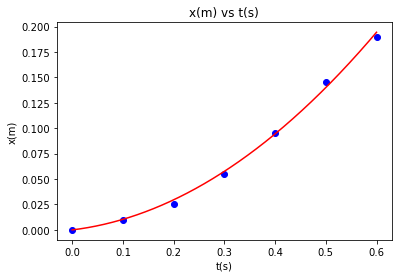

In [3]:
#PUNTO 1
print('Haciendo una ajuste(el mejor ajuste de acuerdo al fenómeno y los datos es el cuadrático):')
fig,ax=plt.subplots()
def func(x, a, b, c):
    return a*(x**2)+b*x+c
ajuste,covarianza= curve_fit(func,datos['t(s)'].tolist(),datos['x(m)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
a=round(ajuste[0],2)
b=round(ajuste[1],2)
c=round(ajuste[2],2)
Δa=round(desviacionestandar[0],2)
Δb=round(desviacionestandar[1],2)
Δc=round(desviacionestandar[2],2)
print('El ajuste es x(t)=at**2+b*t+c,tiene como parametros:')
print(str('a=(')+str(a)+str('+-')+str(Δa)+str(')m/s**2,'),str('b=(')+str(b)+str('+-')+str(Δb)+str(')m/s,'),str('c=(')+str(c)+str('+-')+str(Δc)+str(')m'))
print('----------------------------------')
print('Gráficando y comparando con los puntos obtenidos por los datos, tenemos')
x1=datos['t(s)'].tolist()[0]
x2=datos['t(s)'].tolist()[-1]
x=np.linspace(x1,x2,1000)
ax.plot(x,func(x,a,b,c),color='red')
ax.scatter(datos['t(s)'],datos['x(m)'],color='blue')
ax.set_title('x(m) vs t(s)')
ax.set_ylabel('x(m)')
ax.set_xlabel('t(s)')



In [109]:
#PUNTO 2
print('Calculamos usmax de manera teórica a través del angúlo de elevación, damos su respectivo error:')
#En las notas se demuestra está formula, us=tan(θ)
us=round(np.tan(θmax),2)
#Se puede demostrar derivando y haciendo una aproximación lineal la formúla de la incertidumbre,Δus=sec**2(θ)*Δθ
Δus=abs(round(((1/np.cos(θmax))**2)*Δθmax,2))
print('-----------------------')
print('usmax='+str(us)+str('+-')+str(Δus))

Calculamos usmax de manera teórica a través del angúlo de elevación, damos su respectivo error:
-----------------------
usmax=0.48+-0.01


In [129]:
#PUNTO 3
print('Calculamos a través del ajuste, el coeficiente de fricción cinetíca uk y la aceleración: ')
print('Importante:realizamos el experimento en la tierra,tomamos g=9,80m/s**2 y suponemos que este valor no tiene incertidumbre')
#(1/2)aceleracion=a,aceleracion=2*a
aceleracion=2*a
Δaceleracion=2*Δa
print('------------------------------------')
print('aceleración=('+str(aceleracion)+'+-'+str(Δaceleracion)+str(')m/s**2'))
#aceleracion=gsinθ-ukgcosθ, ukgcosθ=gsinθ-aceleracion, uk=(gsinθ-aceleracion)/gcosθ
#En las notas derivamos parcialmente la expresión para obtener la incertidumbre de uk
uk=round((9.8*np.sin(θmax)-aceleracion)/(9.8*np.cos(θmax)),2)
Δuk=round(abs(Δaceleracion/(np.cos(θmax)*9.80))+abs(((1/np.cos(θmax))*((1/np.cos(θmax))-((aceleracion*np.tan(θmax))/9.8)))*Δθmax),2)
print('uk='+str(uk)+'+-'+str(Δuk))

Calculamos a través del ajuste, el coeficiente de fricción cinetíca uk y la aceleración: 
Importante:realizamos el experimento en la tierra,tomamos g=9,80m/s**2 y suponemos que este valor no tiene incertidumbre
------------------------------------
aceleración=(0.88+-0.08)m/s**2
uk=0.38+-0.02
